## Assignment No. 3

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import SGD
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
#Dataset available on https://bit.ly/ImgClsKeras
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [3]:
#Pre-Processing Data
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)
x_train = x_train/255.0
x_test = x_test/255.0
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (400, 100, 100, 3)
Shape of X_train: (400, 1)


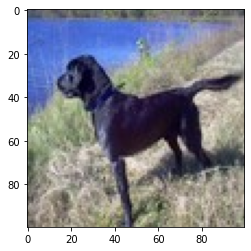

In [4]:
#Checking sample image
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [5]:
#Model Building 
model = Sequential([
 Conv2D(256,(3,3),activation = 'relu',input_shape=(100,100,3)),
 BatchNormalization(),
 MaxPooling2D((4,4)),
 Conv2D(128,(3,3),activation = 'relu'),
 BatchNormalization(),
 MaxPooling2D((2,2)),
 Conv2D(64,(3,3),activation = 'relu'),
 BatchNormalization(),
 MaxPooling2D((2,2)), 
 Flatten(),
 Dense(128,activation='relu'),
 Dropout(0.4),
 Dense(1,activation='sigmoid')
])

Epoch 1/30
63/63 [==============================] - 124s 2s/step - loss: 0.7957 - accuracy: 0.5640 - val_loss: 0.7021 - val_accuracy: 0.4775
Epoch 2/30
63/63 [==============================] - 122s 2s/step - loss: 0.6657 - accuracy: 0.6130 - val_loss: 0.7235 - val_accuracy: 0.5025
Epoch 3/30
63/63 [==============================] - 119s 2s/step - loss: 0.6263 - accuracy: 0.6545 - val_loss: 0.7994 - val_accuracy: 0.5100
Epoch 4/30
63/63 [==============================] - 122s 2s/step - loss: 0.6025 - accuracy: 0.6670 - val_loss: 0.7395 - val_accuracy: 0.5675
Epoch 5/30
63/63 [==============================] - 115s 2s/step - loss: 0.5594 - accuracy: 0.7125 - val_loss: 0.8990 - val_accuracy: 0.5450
Epoch 6/30
63/63 [==============================] - 105s 2s/step - loss: 0.5298 - accuracy: 0.7165 - val_loss: 0.7661 - val_accuracy: 0.5825
Epoch 7/30
63/63 [==============================] - 105s 2s/step - loss: 0.4911 - accuracy: 0.7620 - val_loss: 0.6451 - val_accuracy: 0.6200
Epoch 8/30
63

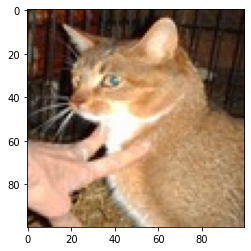

1/1 [==============================] - 0s 194ms/step
Our model says it is a cat
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)      512       
 hNormalization)                          

In [6]:
#Compiling Model
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

#Training Model
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

#Evaluating Results on Test Dataset
model.evaluate(x_test,y_test)

#Making Predictions
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred==0):
 pred = 'dog'
else:
 pred = 'cat'
print("Our model says it is a",pred)

#Model Summary
model.summary()
#Printing Score
score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])